## For noise-reduction in TEM/STEM images

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs

import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
## Use Hyperspy to read in .dm3 image file

f_path = 'D://ePSIC//RAW//removed//OneView_500kX_0167.dm3'
f = hs.load(f_path, lazy=False)


WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, fal

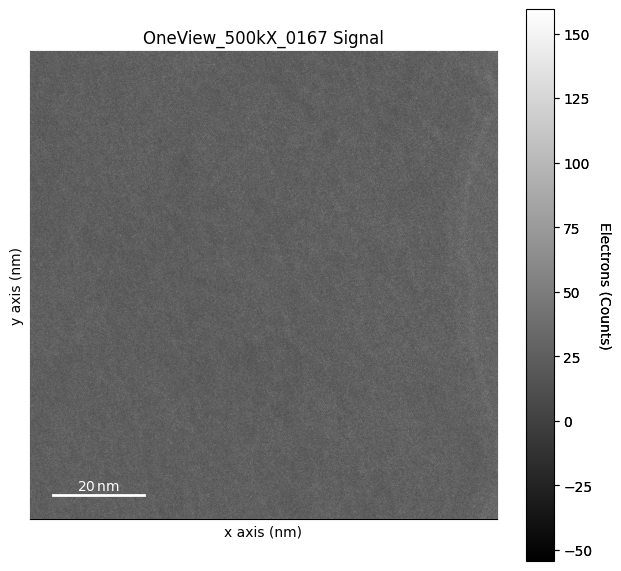

In [3]:
# Show raw image

f.plot()

In [17]:
## Save raw data as numpy array

f_data = f.data
np.save('6_0214', f_data)

## Reload data

data = np.load('6_0214.npy')
data


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

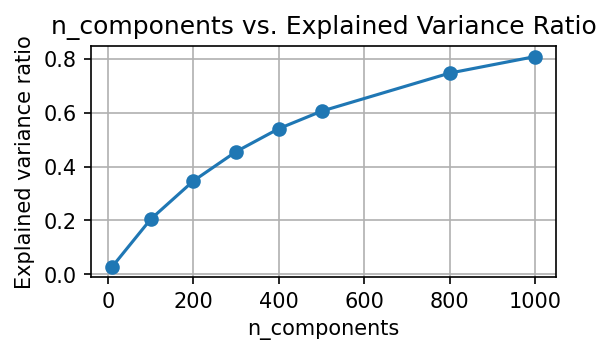

In [12]:
## Scree plot

nums = [10,100, 200, 300, 400, 500, 800, 1000] # using different numbers of components

var_ratio = []

for num in nums:
  pca = PCA(n_components=num)
  pca.fit(data)
  var_ratio.append(np.sum(pca.explained_variance_ratio_)) 

# Figure shows explained variance ratio against number of components
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

Explained variance ratio is 0.6056982231675647


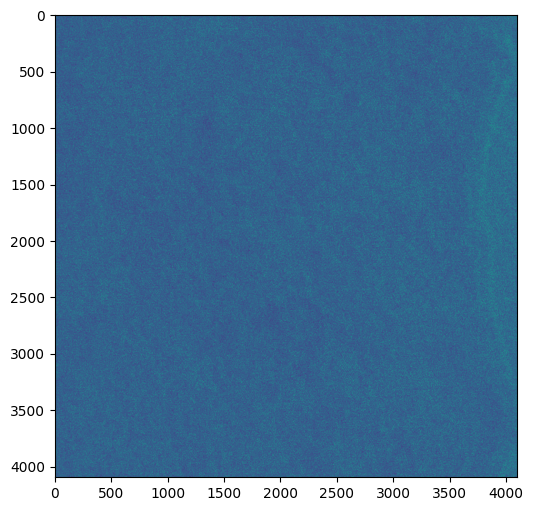

In [24]:
## Set up principle component analysis 

pca = PCA(500) # 500 components captures >50% variance 

transformed = pca.fit_transform(data) # apply to image data
inverted = pca.inverse_transform(transformed) # invert

print('Explained variance ratio is ' +str(sum(pca.explained_variance_ratio_)))

plt.figure(figsize = (6,6))
plt.imshow(inverted)

In [25]:
## hs_transformed_data is a Signal2D dataset with signal dimensions 4096x4096

hs_transformed_data

<Signal2D, title: PCA, dimensions: (|4096, 4096)>

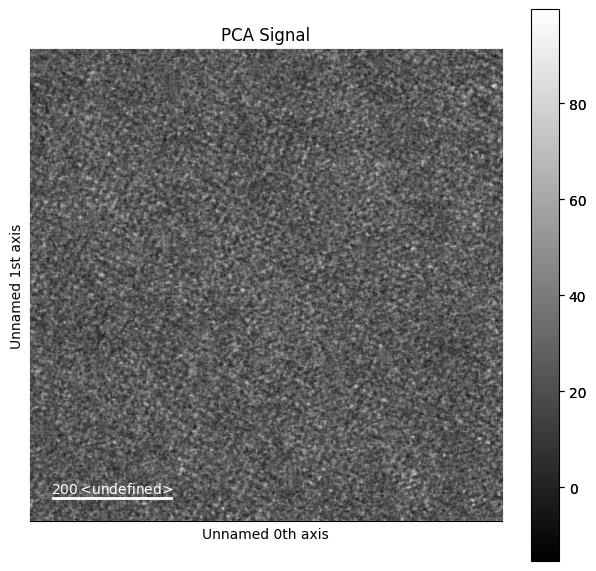

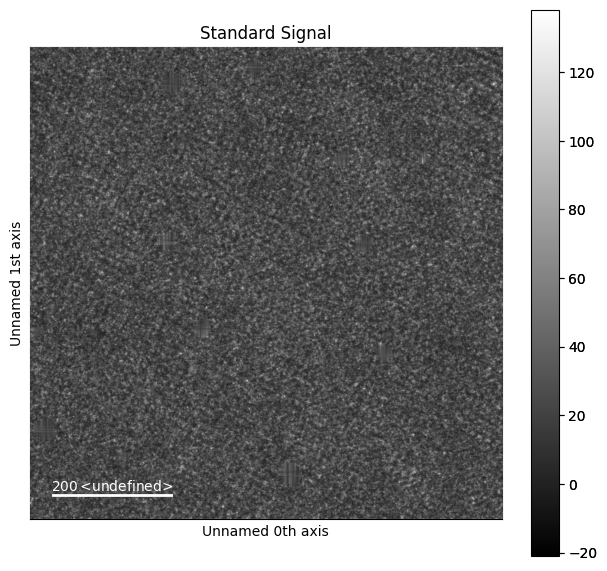

In [26]:
## Generate images to compare PCA'd/non-PCA'd images 

# Send back to Hyperspy
hs_transformed_data = hs.signals.Signal2D(inverted)
hs_data =  hs.signals.Signal2D(data)

hs_transformed_data.metadata.General.title = 'PCA'
hs_data.metadata.General.title = 'Standard'

i_start = 1600
i_end= 2400

hs_transformed_data.isig[i_start:i_end,i_start:i_end].plot() ## much nicer lattice contrast!!
hs_data.isig[i_start:i_end, i_start:i_end].plot()

## Can also look at FFTs

# fft_hs_transformed_data = hs.signals.Signal2D(np.log(np.abs(hs_transformed_data.fft(shift=True))))
# fft_hs_transformed_data.metadata.General.title = 'PCA'
# fft_hs_data= hs.signals.Signal2D(np.log(np.abs(hs_data.fft(shift=True))))
# fft_hs_data.metadata.General.title = 'Standard'

#fft_hs_transformed_data.plot()
#fft_hs_data.plot()
    

In [11]:
## Save noise-reduced data:

# hs_transformed_data.save('pca_data', extension='tiff')